---
title: Design Optimization
type: submodule
---



In [1]:
import numpy
import matplotlib.pyplot as plt
import scipy.optimize
import numpy.random
import cma
from math import pi
import math

def length(v1):
    '''
    finds the length of a vector
    
    :param v1: the vector
    :type v1: tuple or list of floats
    :rtype: float
    '''
    v1 = numpy.array(v1).flatten()
    l = (v1.dot(v1))**.5
    return l

In [2]:
def inner_angle(v1,v2):
    '''
    finds the interior angle between two vectors
    
    :param v1: the first vector
    :type v1: tuple or list of floats
    :param v2: the second vector
    :type v2: tuple or list of floats
    :rtype: float
    '''
    v1 = numpy.array(v1).flatten()
    l1 = length(v1)
    v2 = numpy.array(v2).flatten()
    l2 = length(v2)
    cost = numpy.dot(v1,v2)/l1/l2
    t = math.acos(cost)
    return t

l1 = 1
l2 = 1
l3 = 1
l4 = 1

In [12]:
def solve_kinematics(x):
    x1,y1,x2,y2,x3,y3,x4,y4 = x

    p1 = x1,y1
    p2 = x2,y2
    p3 = x3,y3
    p4 = x4,y4
    
    p1 = numpy.array(p1)
    p2 = numpy.array(p2)
    p3 = numpy.array(p3)
    p4 = numpy.array(p4)
    
    v1 = p2-p1
    v2 = p3-p2
    v3 = p4-p3
    v4 = p1-p4
    
    eq = []
    eq.append(length(v1) - l1)
    eq.append(length(v2) - l2)
    eq.append(length(v3) - l3)
    eq.append(length(v4) - l4)
    eq.append(x1)
    eq.append(y1)
    eq.append(y2)
    eq.append(inner_angle(v1,v4)-30*pi/180)
    eq = numpy.array(eq)
    error = length(eq)
    return error

In [28]:
def create_kinematics(design_params):
    l1,l2,l3,l4 = design_params
    def solve_position(q):
        def solve_kinematics(x):
            x1,y1,x2,y2,x3,y3,x4,y4 = x

            p1 = x1,y1
            p2 = x2,y2
            p3 = x3,y3
            p4 = x4,y4

            p1 = numpy.array(p1)
            p2 = numpy.array(p2)
            p3 = numpy.array(p3)
            p4 = numpy.array(p4)

            v1 = p2-p1
            v2 = p3-p2
            v3 = p4-p3
            v4 = p1-p4

            eq = []
            eq.append(length(v1) - l1)
            eq.append(length(v2) - l2)
            eq.append(length(v3) - l3)
            eq.append(length(v4) - l4)
            eq.append(x1)
            eq.append(y1)
            eq.append(y2)
            eq.append(inner_angle(v1,v4)-q)
            eq = numpy.array(eq)
            error = length(eq)
            return error
        return solve_kinematics
    return solve_position

f_position = create_kinematics([1,1,1,1])
f_my_position=f_position(30*pi/180)

In [29]:
def plot_kinematics(x):
    x1,y1,x2,y2,x3,y3,x4,y4 = x

    p1 = x1,y1
    p2 = x2,y2
    p3 = x3,y3
    p4 = x4,y4
    
    p1 = numpy.array(p1)
    p2 = numpy.array(p2)
    p3 = numpy.array(p3)
    p4 = numpy.array(p4)
    
    points = p1,p2,p3,p4,p1
    points = numpy.array(points)
    plt.plot(*(points.T))

In [30]:
ini = [0,0,1,0,1,1,0,1]
result  = scipy.optimize.minimize(f_my_position,ini)

In [31]:
result.fun

7.915920094303794e-08

In [32]:
result.x

array([-5.37743668e-08, -3.46020796e-08,  9.99999940e-01,  2.96521731e-08,
        1.33974476e-01,  4.99999874e-01, -8.66025509e-01,  4.99999909e-01])

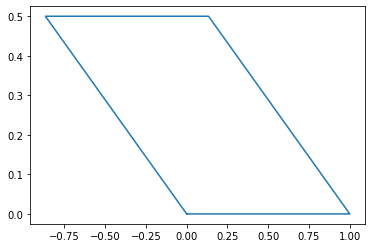

In [33]:
plot_kinematics(result.x)

In [ ]:
def solve_constraints(params):
    l1,l2,l3,l4 = params
    x